In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

df1 = pd.read_csv('1_Drug Overdose Mortality by State.csv')
df2 = pd.read_csv('2_County-level Drug Overdose Mortality in the United States, 2003-2021.csv')
df3 = pd.read_csv('3_Drug overdose death rates, by drug type, sex, age, race, and Hispanic origin United States.csv')

In [2]:
df1.head()

,YEAR,STATE,RATE,DEATHS,URL
0,2022,AL,31.5,"1,492",/nchs/pressroom/states/alabama/al.htm
1,2022,AK,34.3,254,/nchs/pressroom/states/alaska/ak.htm
2,2022,AZ,37.2,"2,664",/nchs/pressroom/states/arizona/az.htm
3,2022,AR,21.7,617,/nchs/pressroom/states/arkansas/ar.htm
4,2022,CA,26.9,"10,952",/nchs/pressroom/states/california/ca.htm


In [3]:
df2.head()

,FIPS,Year,State,FIPS State,County,Population,Model-based Death Rate,Standard Deviation,Lower Confidence Limit,Upper Confidence Limit,Urban/Rural Category,Census Division
0,1001,2017,Alabama,1,"Autauga County, AL","55,448",11.08347,1.13357,9.08398,13.52386,Medium Metro,6
1,1001,2018,Alabama,1,"Autauga County, AL","55,533",10.58276,1.08240,8.67354,12.91299,Medium Metro,6
2,1001,2019,Alabama,1,"Autauga County, AL","55,769",11.05015,1.13016,9.05668,13.48319,Medium Metro,6
3,1001,2012,Alabama,1,"Autauga County, AL","54,970",6.75924,0.69168,5.53928,8.24839,Medium Metro,6
4,1001,2013,Alabama,1,"Autauga County, AL","54,747",7.12040,0.72859,5.83533,8.68899,Medium Metro,6


In [4]:
df3.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1,NaN
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8,NaN
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2,NaN
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,8.9,NaN


# Drug Overdose Deaths by States in 2021

### Cleaning .csv file of unnecessary columns and missing values

In [7]:
df1_updated = df1.drop(columns=['URL'], errors='ignore')
df1_updated['DEATHS'] = df1_updated['DEATHS'].replace(',', '', regex=True).astype(int)

df1_updated

,YEAR,STATE,RATE,DEATHS
0,2022,AL,31.5,1492
1,2022,AK,34.3,254
2,2022,AZ,37.2,2664
3,2022,AR,21.7,617
4,2022,CA,26.9,10952
...,...,...,...,...
546,1999,VA,5.0,366
547,1999,WA,9.3,555
548,1999,WV,4.1,75
549,1999,WI,4.0,212


##  Pie chart of Proportion of Death Rates in 2021

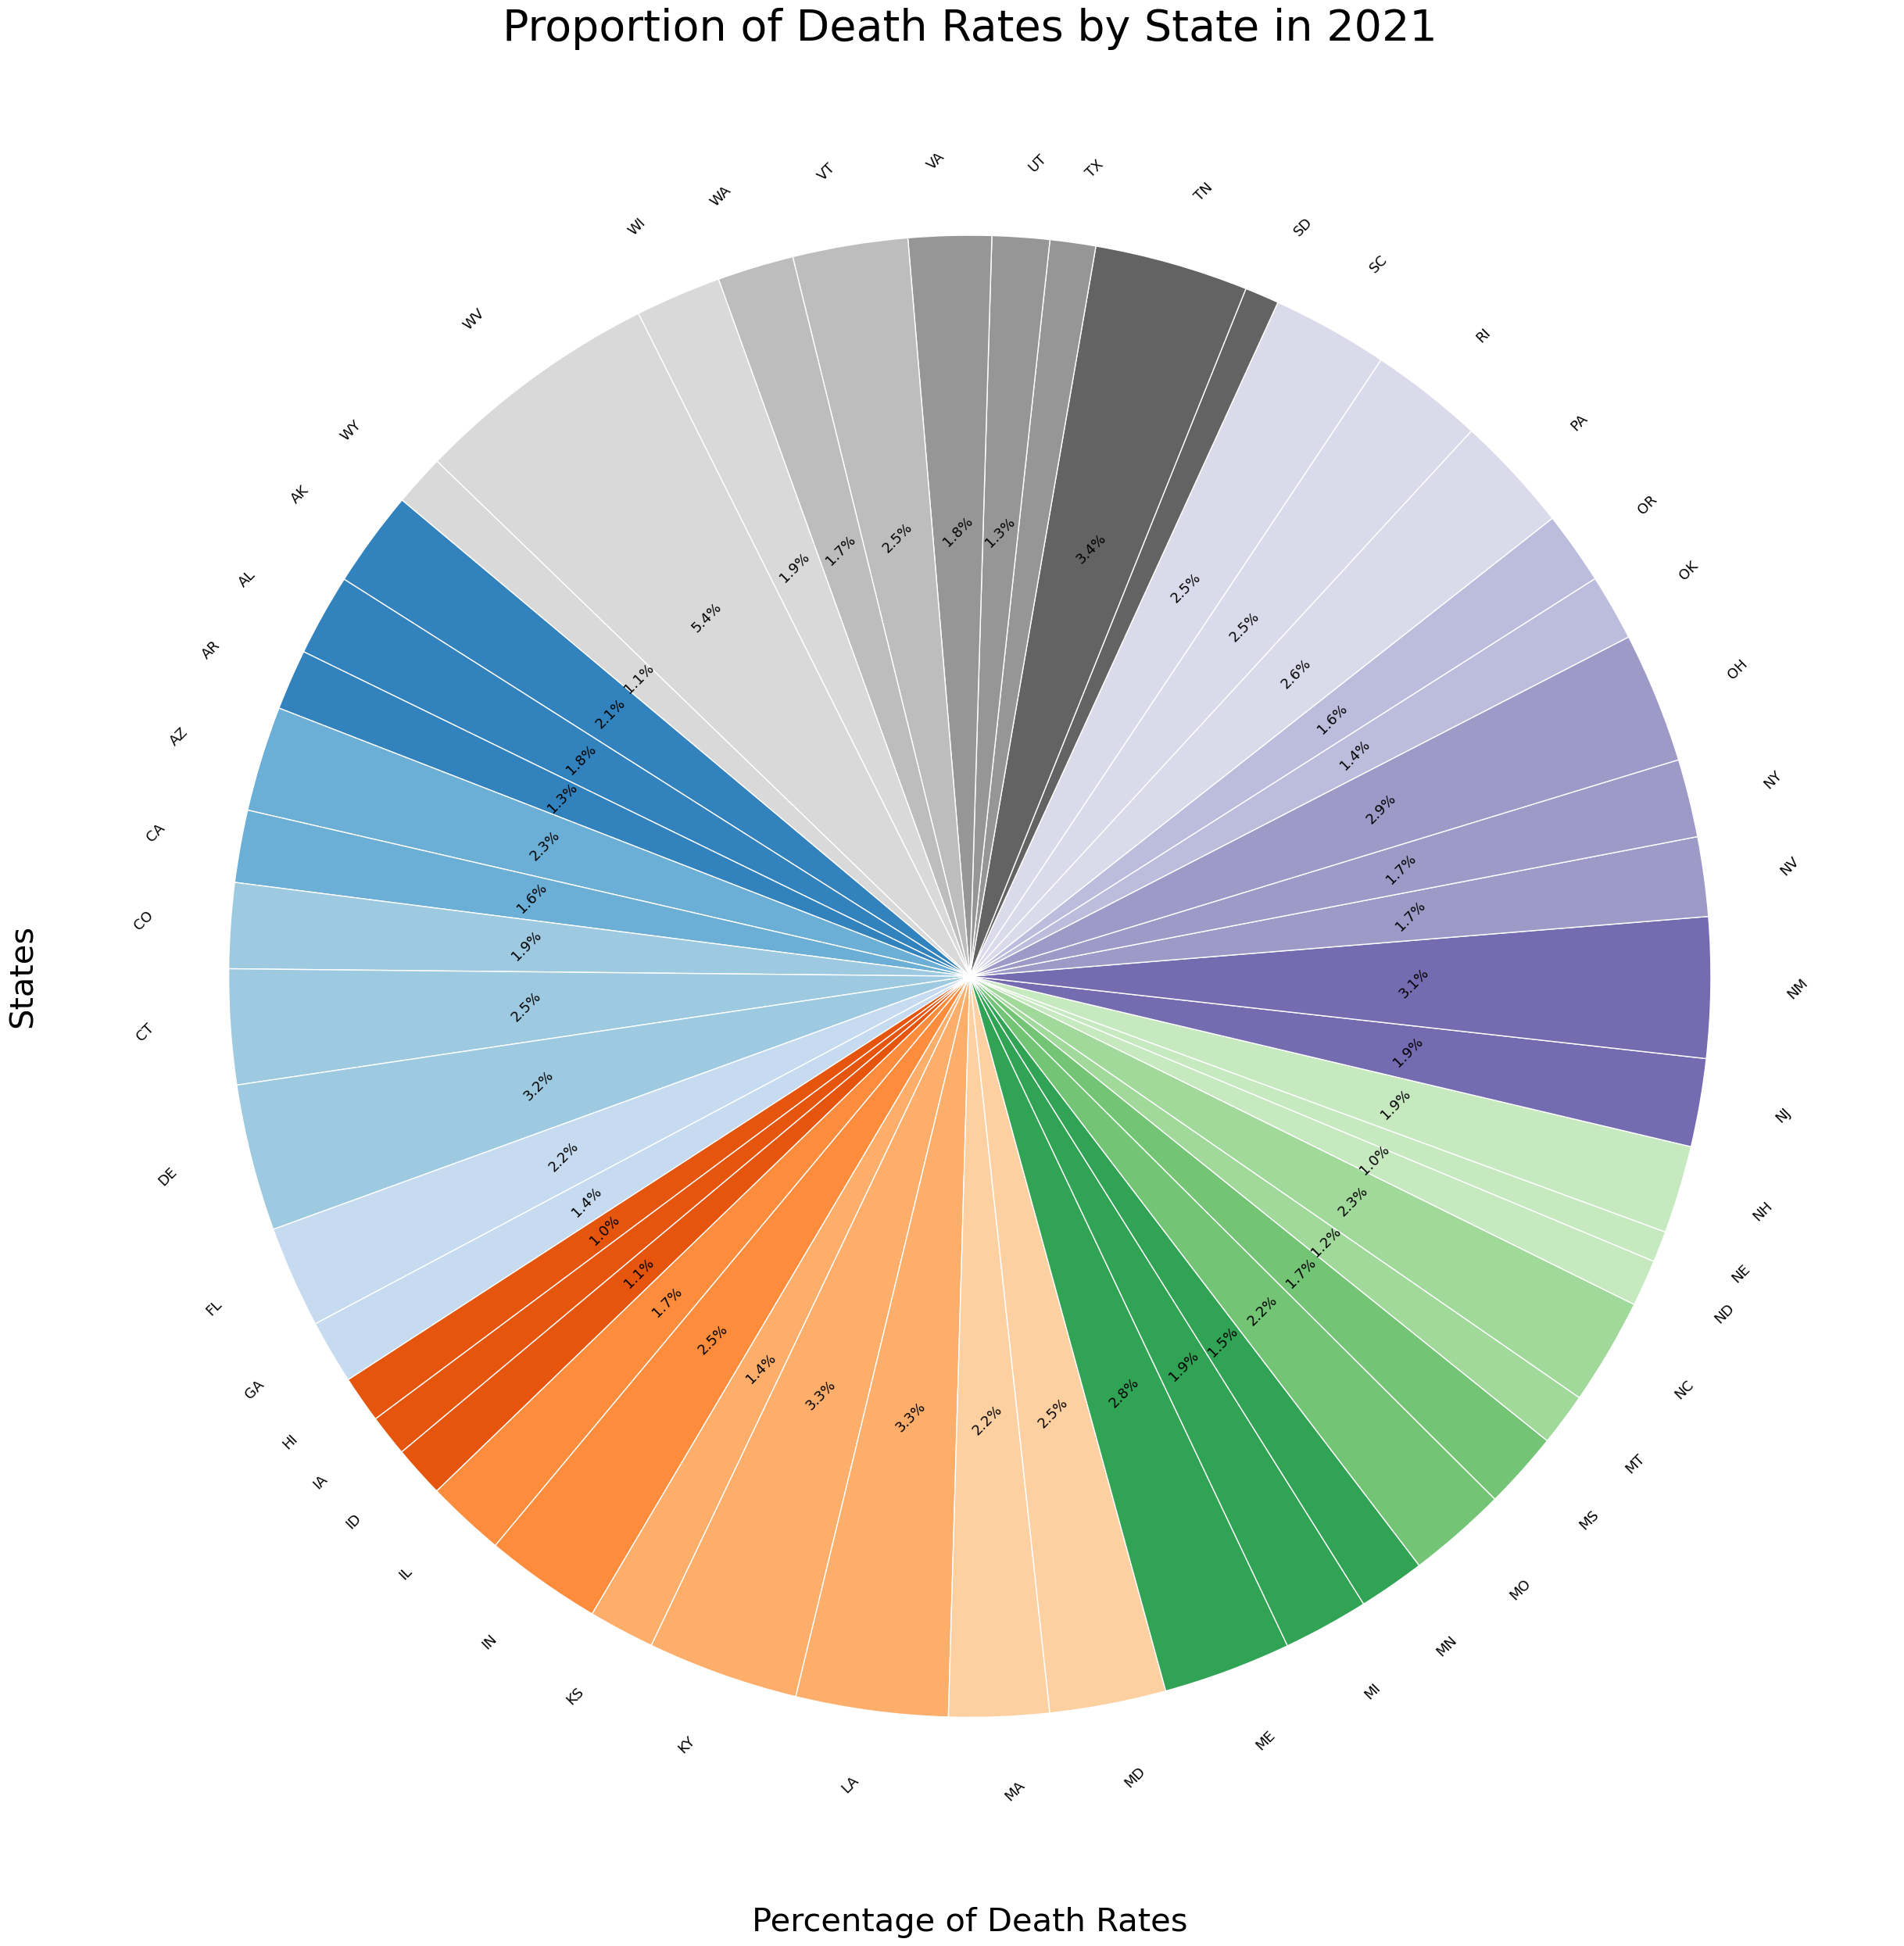

In [81]:
df1_2021 = df1_updated[df1_updated['YEAR'] == 2021]
state_death_rates_2021 = df1_2021.groupby('STATE')['RATE'].sum()

plt.figure(figsize=(50, 25))
state_death_rates_2021.plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}%' if p > 1 else '', 
    startangle=140,
    colormap='tab20c',
    textprops={'fontsize': 13, 'rotation': 45},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1} 
)

plt.title('Proportion of Death Rates by State in 2021', fontsize=40)
plt.xlabel('Percentage of Death Rates', fontsize=30)
plt.ylabel('States', fontsize=30)
plt.tight_layout()

plt.show()

## Bar chart of Proportion of Death Rates in 2021

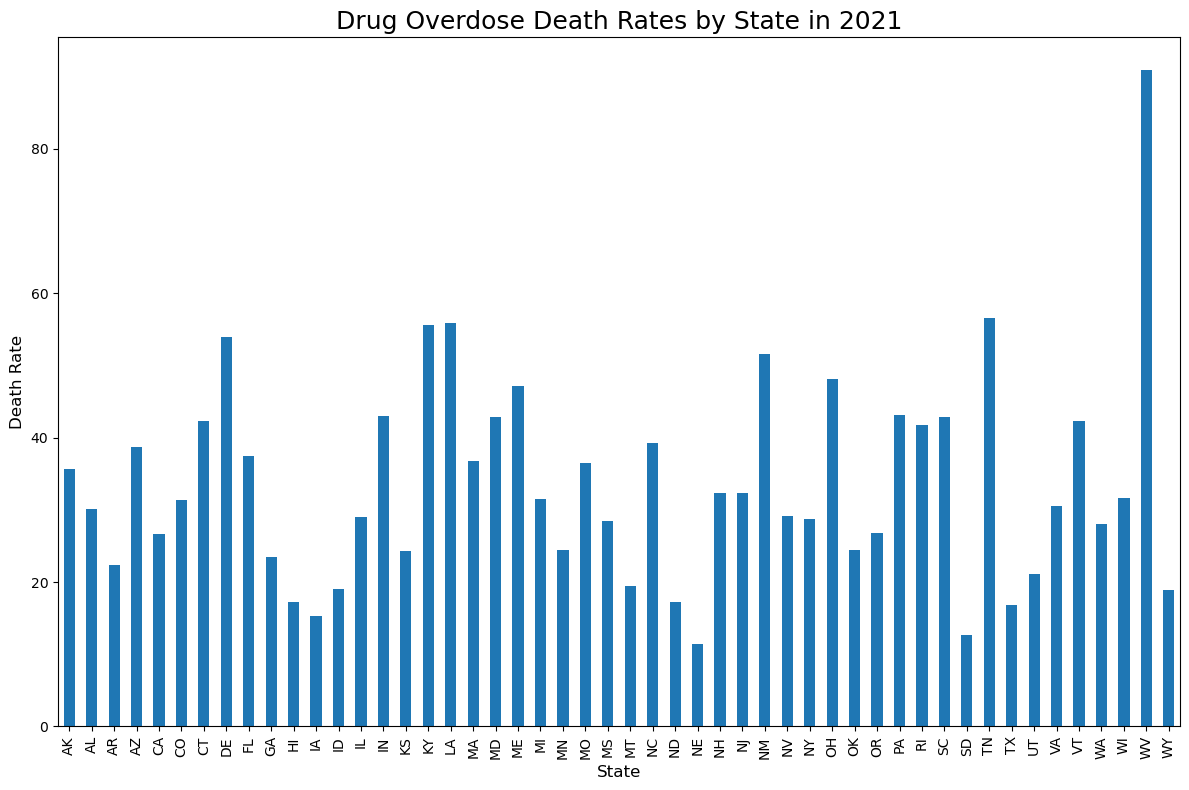

In [87]:
df1_2021 = df1_updated[df1_updated['YEAR'] == 2021]
state_death_rates_2021 = df1_2021.groupby('STATE')['RATE'].mean() 

plt.figure(figsize=(12, 8))
state_death_rates_2021.sort_index().plot(kind='bar')

plt.title('Drug Overdose Death Rates by State in 2021', fontsize=18)
plt.xlabel('State', fontsize=12)
plt.ylabel('Death Rate', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()

plt.show()

## Scatter Plot of Top 10 States by Mortality Rate

In [13]:
top_10_states_2021 = df1_2021.sort_values(by='RATE', ascending=False).head(10)
low_10_states_2021 = df1_2021.sort_values(by='RATE', ascending=True).head(10)

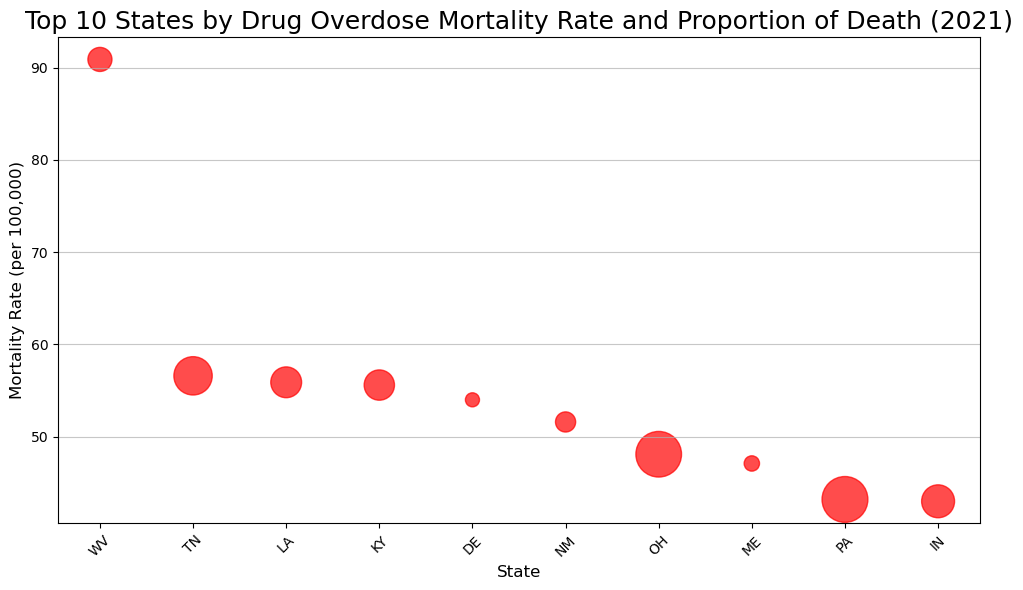

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(
    top_10_states_2021['STATE'], 
    top_10_states_2021['RATE'], 
    s=top_10_states_2021['DEATHS'] / 5, 
    alpha=0.7, 
    c='red'
)

plt.title("Top 10 States by Drug Overdose Mortality Rate and Proportion of Death (2021)", fontsize=18)
plt.xlabel("State", fontsize=12)
plt.ylabel("Mortality Rate (per 100,000)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()

plt.show()

In [15]:
top_10_states_2021

,YEAR,STATE,RATE,DEATHS
98,2021,WV,90.9,1501
92,2021,TN,56.6,3813
68,2021,LA,55.9,2463
67,2021,KY,55.6,2381
58,2021,DE,54.0,513
81,2021,NM,51.6,1052
85,2021,OH,48.1,5397
69,2021,ME,47.1,611
88,2021,PA,43.2,5449
64,2021,IN,43.0,2811


## Scatter Plot Lowest 10 States by Mortality Rate

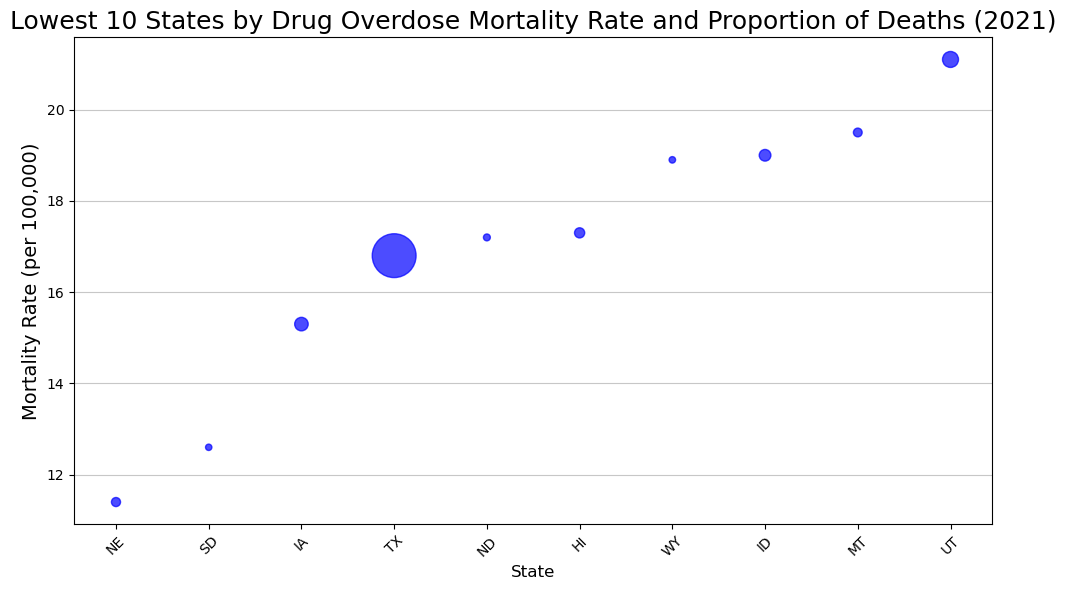

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(
    low_10_states_2021['STATE'], 
    low_10_states_2021['RATE'], 
    s=low_10_states_2021['DEATHS'] / 5, 
    alpha=0.7, 
    c='blue'
)
plt.title("Lowest 10 States by Drug Overdose Mortality Rate and Proportion of Deaths (2021)", fontsize=18)
plt.xlabel("State", fontsize=12)
plt.ylabel("Mortality Rate (per 100,000)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

In [18]:
low_10_states_2021

,YEAR,STATE,RATE,DEATHS
77,2021,NE,11.4,214
91,2021,SD,12.6,105
65,2021,IA,15.3,475
93,2021,TX,16.8,4984
84,2021,ND,17.2,124
61,2021,HI,17.3,269
100,2021,WY,18.9,109
62,2021,ID,19.0,354
76,2021,MT,19.5,199
94,2021,UT,21.1,662


## Heat Map of Drug Overdose Death Rates by State

<Figure size 3000x2000 with 0 Axes>

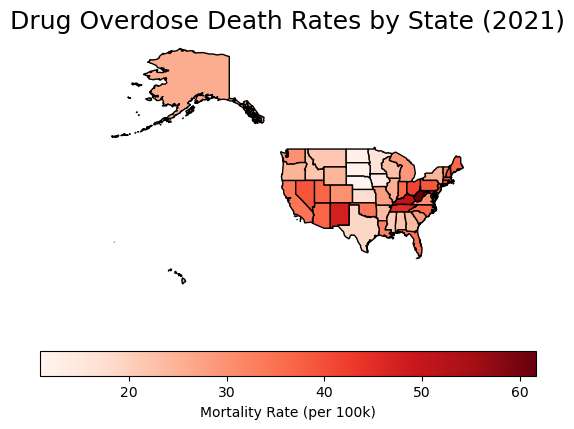

In [101]:
df2_year_2021 = df2[df2['Year'] == 2021].copy()
df2_year_2021['Model-based Death Rate'] = pd.to_numeric(df2_year_2021['Model-based Death Rate'], errors='coerce')
df2_year_2021 = df2_year_2021.drop_duplicates()

state_mortality = (
    df2_year_2021.groupby('State', as_index=False)['Model-based Death Rate']
    .mean()
)
us_states = gpd.read_file('ne_50m_admin_1_states_provinces.shp')
us_states = us_states[us_states['admin'] == 'United States of America']
gdf = us_states.rename(columns={'name': 'State'})
gdf = gdf.merge(state_mortality, on='State', how='left')

plt.figure(figsize=(30, 20))  
ax = gdf.plot(
    column='Model-based Death Rate',
    cmap='Reds',
    legend=True,
    legend_kwds={'label': "Mortality Rate (per 100k)", 'orientation': "horizontal"},
    edgecolor='black'
)
plt.title('Drug Overdose Death Rates by State (2021)', fontsize=18)
plt.axis('off')

plt.show()

## Drug Overdose Death Rates by Sex & Race & Age

### Cleaning .csv file of unnecessary columns and missing values

In [22]:
columns_to_drop = ['INDICATOR', 'PANEL_NUM', 'UNIT', 'UNIT_NUM', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'YEAR_NUM', 'AGE_NUM', 'FLAG']
df3_updated = df3.drop(columns=columns_to_drop, errors='ignore')
df3_updated.rename(columns={
    'PANEL': 'Drug Type',
    'STUB_NAME': 'Category',
    'STUB_LABEL': 'Sex/Race',
    'AGE': 'Age Group',
    'ESTIMATE': 'Death Rate',
    'YEAR': 'Year'
}, inplace=True)

df3_updated = df3_updated.dropna(subset=['Death Rate'])
df3_updated['Death Rate'] = pd.to_numeric(df3_updated['Death Rate'], errors='coerce')
df3_updated['Age Group'] = df3_updated['Age Group'].replace('Under 15 years', '0-14 years')
df3_filtered_sex_race = df3_updated[
    (df3_updated['Age Group'] != 'All ages') & 
    (~df3_updated['Sex/Race'].isin(['Male', 'Female']))
]

df3_updated

,Drug Type,Category,Sex/Race,Year,Age Group,Death Rate
0,All drug overdose deaths,Total,All persons,1999,All ages,6.1
1,All drug overdose deaths,Total,All persons,2000,All ages,6.2
2,All drug overdose deaths,Total,All persons,2001,All ages,6.8
3,All drug overdose deaths,Total,All persons,2002,All ages,8.2
4,All drug overdose deaths,Total,All persons,2003,All ages,8.9
...,...,...,...,...,...,...
6221,Drug overdose deaths involving heroin,Sex and age,Female: 25-34 years,2018,25-34 years,5.2
6222,Drug overdose deaths involving heroin,Sex and age,Female: 35-44 years,2018,35-44 years,4.4
6223,Drug overdose deaths involving heroin,Sex and age,Female: 45-54 years,2018,45-54 years,3.4
6224,Drug overdose deaths involving heroin,Sex and age,Female: 55-64 years,2018,55-64 years,2.3


### Drug Overdose Death Rates by Age Group vs. Sex

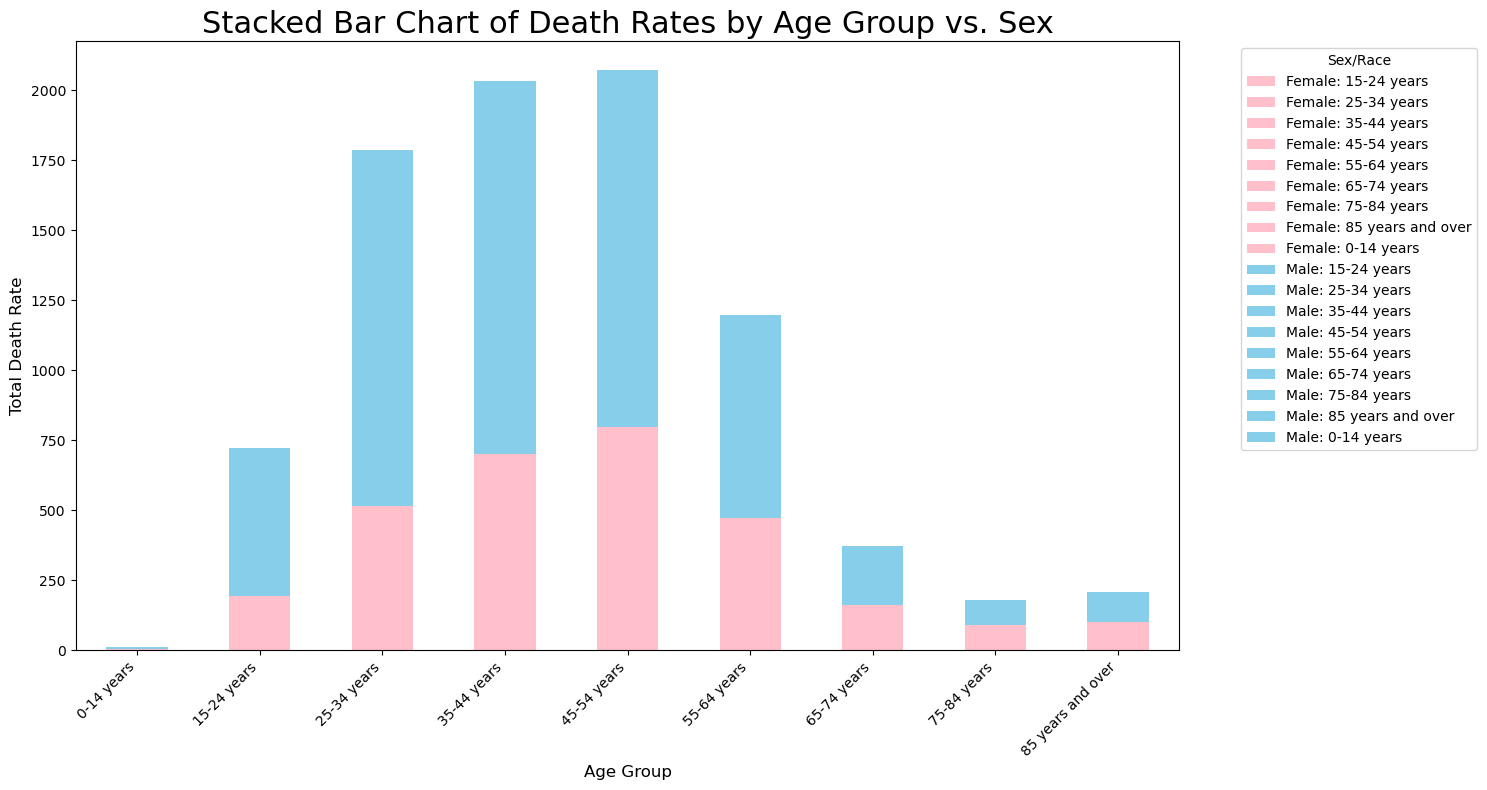

In [103]:
stacked_data = df3_filtered_sex_race.groupby(['Age Group', 'Sex/Race'])['Death Rate'].sum().unstack()
stacked_data_renamed = stacked_data.rename(columns={
    'Female: Under 15 years': 'Female: 0-14 years',
    'Male: Under 15 years': 'Male: 0-14 years'
})
stacked_data_filtered = stacked_data_renamed.loc[:, [col for col in stacked_data_renamed.columns if 'Male' in col or 'Female' in col]]
colors = ['skyblue' if 'Male' in col else 'pink' for col in stacked_data_filtered.columns]

stacked_data_filtered.plot(
    kind='bar', 
    stacked=True, 
    figsize=(15, 8), 
    color=colors
)
plt.title('Stacked Bar Chart of Death Rates by Age Group vs. Sex', fontsize=22)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Death Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sex/Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

### Drug Overdose Death Rates by Sex vs. Race

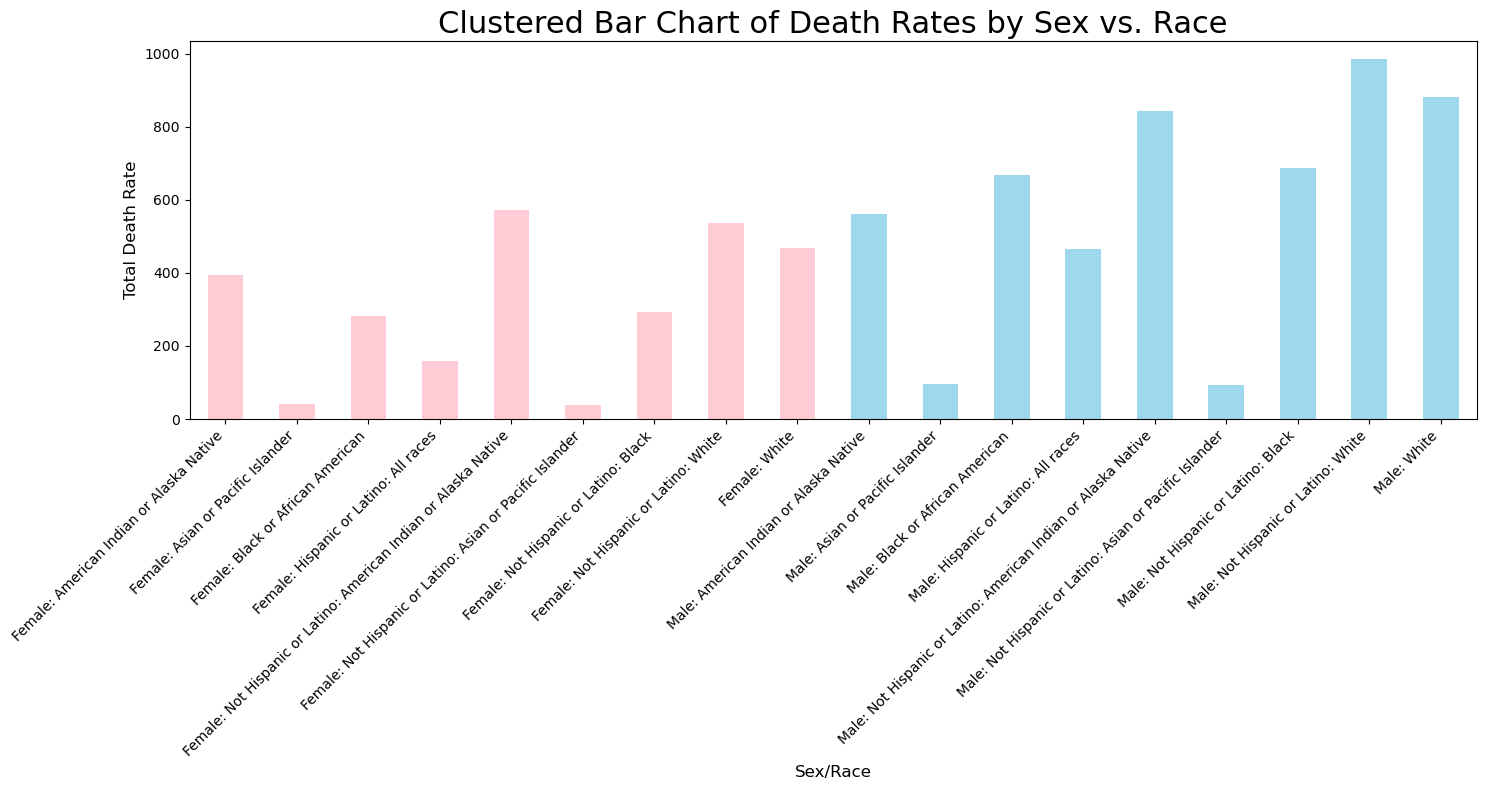

In [105]:
valid_sex_race_categories = [
    'Male: White', 'Male: Black or African American',
    'Male: American Indian or Alaska Native', 'Male: Asian or Pacific Islander',
    'Female: White', 'Female: Black or African American',
    'Female: American Indian or Alaska Native', 'Female: Asian or Pacific Islander',
    'Male: Hispanic or Latino: All races', 'Male: Not Hispanic or Latino: White',
    'Male: Not Hispanic or Latino: Black', 'Male: Not Hispanic or Latino: American Indian or Alaska Native',
    'Male: Not Hispanic or Latino: Asian or Pacific Islander', 'Female: Hispanic or Latino: All races',
    'Female: Not Hispanic or Latino: White', 'Female: Not Hispanic or Latino: Black',
    'Female: Not Hispanic or Latino: American Indian or Alaska Native',
    'Female: Not Hispanic or Latino: Asian or Pacific Islander'
]

df3_filtered = df3_updated[df3_updated['Sex/Race'].isin(valid_sex_race_categories)]
filtered_sex_race_data = df3_filtered.groupby('Sex/Race')['Death Rate'].sum()
colors = ['skyblue' if 'Male' in index else 'pink' for index in filtered_sex_race_data.index]
filtered_sex_race_data.plot(
    kind='bar', 
    figsize=(15, 8), 
    color=colors, 
    alpha=0.8
)
plt.title('Clustered Bar Chart of Death Rates by Sex vs. Race', fontsize=22)
plt.xlabel('Sex/Race', fontsize=12)
plt.ylabel('Total Death Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## Average Drug Overdose Death Rates Over Time by Age Group

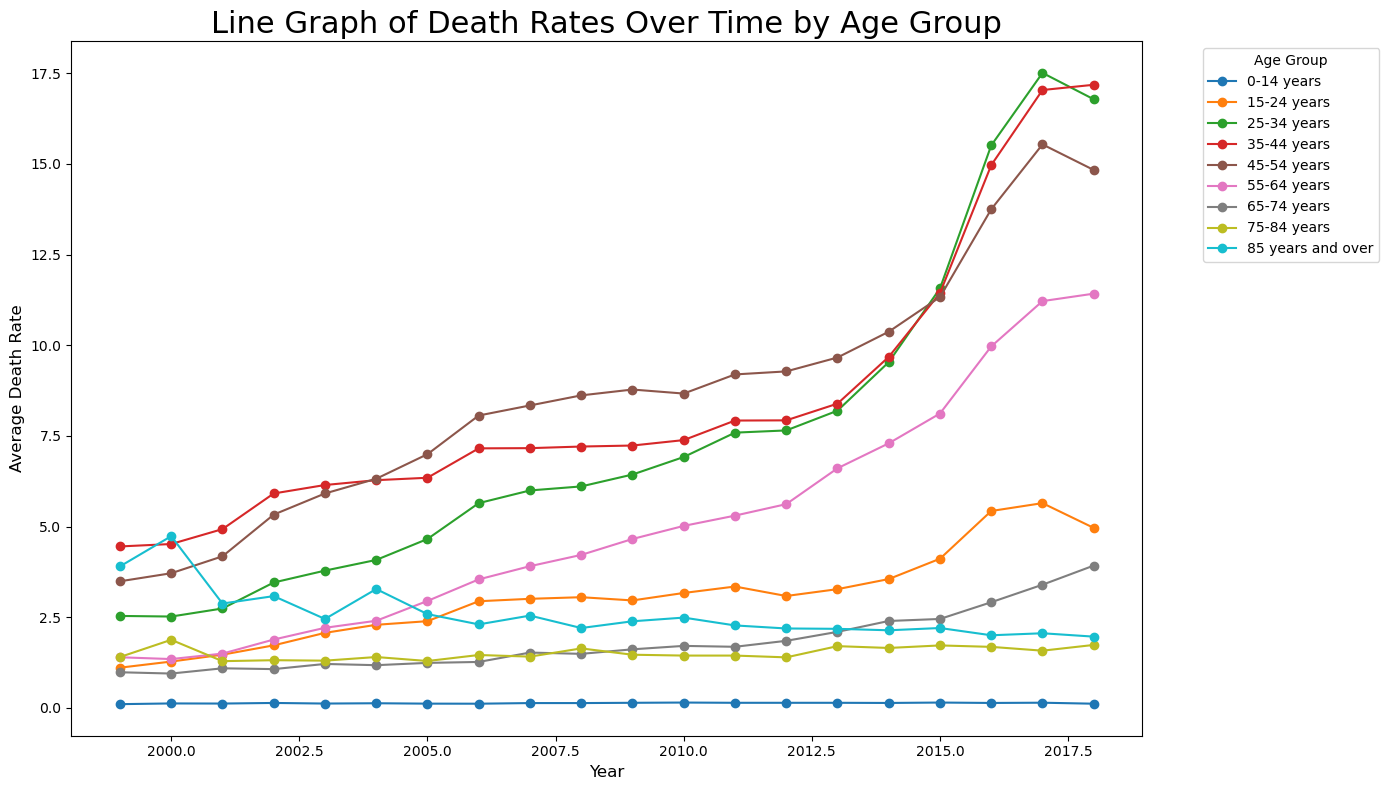

In [109]:
df3_filtered_no_all_ages = df3_updated[df3_updated['Age Group'] != 'All ages']
line_data_time_age = df3_filtered_no_all_ages.groupby(['Year', 'Age Group'])['Death Rate'].mean().unstack()

line_data_time_age.plot(
    kind='line', 
    figsize=(14, 8), 
    marker='o', 
    colormap='tab10'
)
plt.title('Line Graph of Death Rates Over Time by Age Group', fontsize=22)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Death Rate', fontsize=12)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()